In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


<AxesSubplot:title={'center':'Traffic count'}>

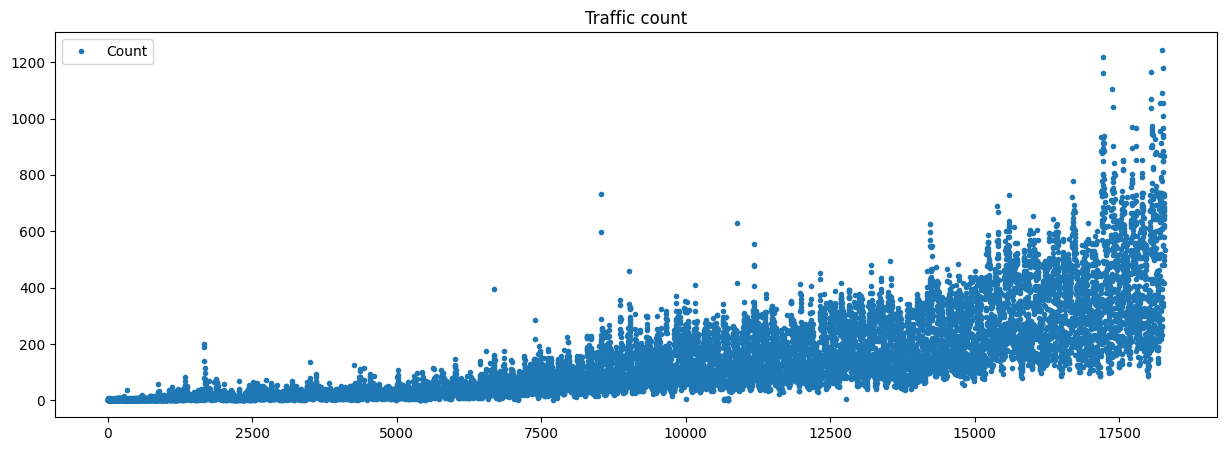

In [3]:
df.drop(df.columns[[0]], axis=1, inplace=False).plot(style='.', figsize=(15,5), title='Traffic count')


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


In [5]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
#df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [6]:
df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25 00:00:00,8,2012-08-25 00:00:00
2012-08-25 01:00:00,2,2012-08-25 01:00:00
2012-08-25 02:00:00,6,2012-08-25 02:00:00
2012-08-25 03:00:00,2,2012-08-25 03:00:00
2012-08-25 04:00:00,2,2012-08-25 04:00:00


In [8]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df.reset_index())

Initial log joint probability = -165.451


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       43822.6    0.00871396       1594.37           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       43840.3    0.00332981       216.053           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         43845    0.00161978       377.115           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       43846.5   8.41974e-05       170.251      0.1329      0.5909      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       43847.2    0.00345359       690.378      0.1653           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [9]:
future = model.make_future_dataframe(periods=24000 ,freq='h')
future

,ds
0,2012-08-25 00:00:00
1,2012-08-25 01:00:00
2,2012-08-25 02:00:00
3,2012-08-25 03:00:00
4,2012-08-25 04:00:00
...,...
42283,2017-06-21 19:00:00
42284,2017-06-21 20:00:00
42285,2017-06-21 21:00:00
42286,2017-06-21 22:00:00


In [10]:
forecast = model.predict(future)


In [11]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25 00:00:00,15.273519,-81.879516,90.034371,15.273519,15.273519,-9.603411,-9.603411,-9.603411,5.315729,...,-6.796933,-6.796933,-6.796933,-8.122208,-8.122208,-8.122208,0.0,0.0,0.0,5.670108
1,2012-08-25 01:00:00,15.264491,-101.763522,76.208554,15.264491,15.264491,-34.115019,-34.115019,-34.115019,-17.130117,...,-8.839952,-8.839952,-8.839952,-8.144950,-8.144950,-8.144950,0.0,0.0,0.0,-18.850528
2,2012-08-25 02:00:00,15.255463,-130.024738,41.525611,15.255463,15.255463,-58.891235,-58.891235,-58.891235,-39.722617,...,-11.000624,-11.000624,-11.000624,-8.167993,-8.167993,-8.167993,0.0,0.0,0.0,-43.635772
3,2012-08-25 03:00:00,15.246436,-149.948160,22.038313,15.246436,15.246436,-78.713944,-78.713944,-78.713944,-57.251143,...,-13.271466,-13.271466,-13.271466,-8.191336,-8.191336,-8.191336,0.0,0.0,0.0,-63.467509
4,2012-08-25 04:00:00,15.237408,-167.263675,9.882189,15.237408,15.237408,-92.212141,-92.212141,-92.212141,-68.353684,...,-15.643482,-15.643482,-15.643482,-8.214975,-8.214975,-8.214975,0.0,0.0,0.0,-76.974733


In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
42283,2017-06-21 19:00:00,2117.329251,1360.386607,3021.305886,1327.692210,2953.194339,37.831973,37.831973,37.831973,38.782059,...,23.786774,23.786774,23.786774,-24.736860,-24.736860,-24.736860,0.0,0.0,0.0,2155.161225
42284,2017-06-21 20:00:00,2117.397173,1347.173152,3011.767182,1327.727768,2953.335295,34.284479,34.284479,34.284479,35.533019,...,23.513423,23.513423,23.513423,-24.761963,-24.761963,-24.761963,0.0,0.0,0.0,2151.681651
42285,2017-06-21 21:00:00,2117.465094,1361.108930,2998.675829,1327.763326,2953.476251,31.463586,31.463586,31.463586,33.056453,...,23.193674,23.193674,23.193674,-24.786542,-24.786542,-24.786542,0.0,0.0,0.0,2148.928680
42286,2017-06-21 22:00:00,2117.533016,1341.759247,2992.874909,1327.798885,2953.617207,27.973212,27.973212,27.973212,29.955184,...,22.828625,22.828625,22.828625,-24.810597,-24.810597,-24.810597,0.0,0.0,0.0,2145.506228
42287,2017-06-21 23:00:00,2117.600937,1333.144915,2999.500749,1327.834443,2953.758163,19.287534,19.287534,19.287534,21.701530,...,22.420134,22.420134,22.420134,-24.834129,-24.834129,-24.834129,0.0,0.0,0.0,2136.888472


In [13]:
import pickle
with open('saved_model', 'wb') as file:
    pickle.dump(model, file)